In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
"""!unzip /content/drive/MyDrive/emotion_detection_dataset.zip -d /content/drive/MyDrive/"""

'!unzip /content/drive/MyDrive/emotion_detection_dataset.zip -d /content/drive/MyDrive/'

In [ ]:
"""root = /content/drive/MyDrive/emotion_detection_dataset

for dir_name, subdirList, fileList in os.walk(rootdir):
  print('Directory: ', dir_name)
  for fname in fileList:
    print(F)
"""

"root = /content/drive/MyDrive/emotion_detection_dataset\n\nfor dir_name, subdirList, fileList in os.walk(rootdir):\n  print('Directory: ', dir_name)\n  for fname in fileList:\n    print(F)\n"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = "/content/archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done!")

Done!


In [ ]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf



In [ ]:
train_img_datagen = ImageDataGenerator(rescale=1./255)
val_img_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_img_datagen.flow_from_directory(
    'archive/train', 
    target_size = (48,48),
    batch_size = 64,
    color_mode = 'rgb',
    class_mode = 'categorical'
)
print(train_set)

val_set = val_img_datagen.flow_from_directory(
    'archive/test', 
    target_size = (48,48),
    batch_size = 64,
    color_mode = 'rgb',
    class_mode = 'categorical'
)

FileNotFoundError: ignored

In [ ]:
import tensorflow as tf
base_model = tf.keras.applications.ResNet50(input_shape = (48,48,3), include_top=False, weights="imagenet")

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
def the_model():
  model = Sequential()
  #model.add(base_model)
  model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(128,128,3), data_format='channels_last'))
  model.add(Conv2D(64, kernel_size=(3,3), padding = 'same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, kernel_size=(3,3), padding = 'same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), padding = 'same'))
  model.add(Conv2D(64, kernel_size=(3,3), padding = 'same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), padding = 'same'))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(7, activation='softmax'))
  return model

In [ ]:
model1 = the_model()
model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model1.info = model1.fit_generator(train_set, steps_per_epoch=499, epochs=5, validation_data=val_set)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5


KeyboardInterrupt: ignored

Text(0, 0.5, 'accuracy')

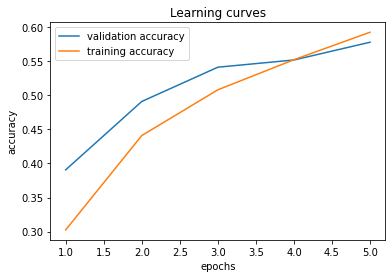

In [ ]:
plt.plot(range(1,6), model1.info.history['val_accuracy'], label='validation accuracy')
plt.plot(range(1,6), model1.info.history['accuracy'], label='training accuracy')
plt.legend()
plt.title('Learning curves')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [ ]:
model2 = the_model()
model2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model2.info = model2.fit_generator(train_set, steps_per_epoch=449, epochs=10, validation_data=val_set)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
449/449 [==============================] - 359s 799ms/step - loss: 1.6952 - accuracy: 0.3165 - val_loss: 1.4582 - val_accuracy: 0.4348
Epoch 2/10
449/449 [==============================] - 358s 797ms/step - loss: 1.4090 - accuracy: 0.4575 - val_loss: 1.3056 - val_accuracy: 0.4912
Epoch 3/10
449/449 [==============================] - 358s 798ms/step - loss: 1.2614 - accuracy: 0.5178 - val_loss: 1.2024 - val_accuracy: 0.5404
Epoch 4/10
449/449 [==============================] - 359s 799ms/step - loss: 1.1721 - accuracy: 0.5521 - val_loss: 1.1480 - val_accuracy: 0.5648
Epoch 5/10
449/449 [==============================] - 359s 799ms/step - loss: 1.0916 - accuracy: 0.5858 - val_loss: 1.1334 - val_accuracy: 0.5709
Epoch 6/10
449/449 [==============================] - 358s 797ms/step - loss: 1.0106 - accuracy: 0.6220 - val_loss: 1.1004 - val_accuracy: 0.5830
Epoch 7/10
449/449 [==============================] - 358s 797ms/step - loss: 0.9256 - accuracy: 0.6540 - val_loss: 1.0852 -

Text(0, 0.5, 'accuracy')

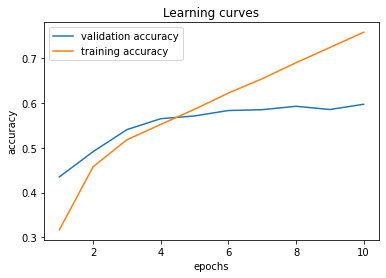

In [ ]:
plt.plot(range(1,11), model2.info.history['val_accuracy'], label='validation accuracy')
plt.plot(range(1,11), model2.info.history['accuracy'], label='training accuracy')
plt.legend()
plt.title('Learning curves')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [ ]:
model3 = the_model()
model3.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model3.info = model3.fit_generator(train_set, steps_per_epoch=449, epochs=20, validation_data=val_set)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
449/449 [==============================] - 365s 811ms/step - loss: 1.7344 - accuracy: 0.2915 - val_loss: 1.5301 - val_accuracy: 0.4131
Epoch 2/20
449/449 [==============================] - 363s 808ms/step - loss: 1.4387 - accuracy: 0.4482 - val_loss: 1.3075 - val_accuracy: 0.4971
Epoch 3/20
449/449 [==============================] - 363s 809ms/step - loss: 1.2804 - accuracy: 0.5109 - val_loss: 1.2113 - val_accuracy: 0.5433
Epoch 4/20
449/449 [==============================] - 360s 802ms/step - loss: 1.1854 - accuracy: 0.5493 - val_loss: 1.1701 - val_accuracy: 0.5566
Epoch 5/20
449/449 [==============================] - 363s 808ms/step - loss: 1.1149 - accuracy: 0.5785 - val_loss: 1.1246 - val_accuracy: 0.5706
Epoch 6/20
449/449 [==============================] - 360s 803ms/step - loss: 1.0344 - accuracy: 0.6111 - val_loss: 1.1098 - val_accuracy: 0.5773
Epoch 7/20
449/449 [==============================] - 358s 798ms/step - loss: 0.9667 - accuracy: 0.6365 - val_loss: 1.0993 -

Text(0, 0.5, 'accuracy')

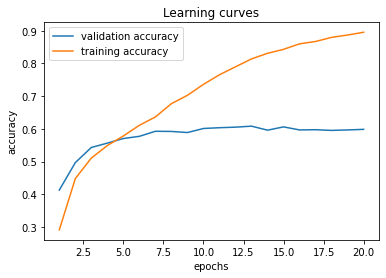

In [ ]:
plt.plot(range(1,21), model3.info.history['val_accuracy'], label='validation accuracy')
plt.plot(range(1,21), model3.info.history['accuracy'], label='training accuracy')
plt.legend()
plt.title('Learning curves')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [ ]:
model4 = the_model()
model4.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
model4.info = model4.fit_generator(train_set, steps_per_epoch=449, epochs=20, validation_data=val_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
449/449 [==============================] - 26s 54ms/step - loss: 1.7158 - accuracy: 0.3156 - val_loss: 1.6041 - val_accuracy: 0.3874
Epoch 2/20
449/449 [==============================] - 24s 52ms/step - loss: 1.5226 - accuracy: 0.4184 - val_loss: 1.4473 - val_accuracy: 0.4483
Epoch 3/20
449/449 [==============================] - 23s 52ms/step - loss: 1.4056 - accuracy: 0.4635 - val_loss: 1.3659 - val_accuracy: 0.4748
Epoch 4/20
449/449 [==============================] - 23s 52ms/step - loss: 1.3001 - accuracy: 0.5043 - val_loss: 1.3117 - val_accuracy: 0.5014
Epoch 5/20
449/449 [==============================] - 23s 52ms/step - loss: 1.2033 - accuracy: 0.5479 - val_loss: 1.2808 - val_accuracy: 0.5078
Epoch 6/20
449/449 [==============================] - 23s 52ms/step - loss: 1.0925 - accuracy: 0.5947 - val_loss: 1.2614 - val_accuracy: 0.5312
Epoch 7/20
449/449 [==============================] - 24s 52ms/step - loss: 0.9619 - accuracy: 0.6508 - val_loss: 1.2586 - val_accuracy:

KeyboardInterrupt: ignored

Text(0, 0.5, 'accuracy')

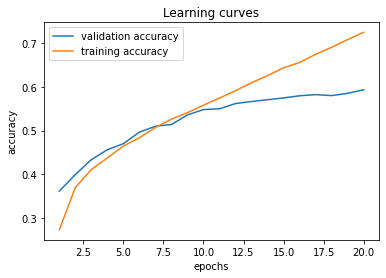

In [ ]:
plt.plot(range(1,21), model4.info.history['val_accuracy'], label='validation accuracy')
plt.plot(range(1,21), model4.info.history['accuracy'], label='training accuracy')
plt.legend()
plt.title('Learning curves')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [ ]:
model5 = the_model()
model5.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
model5.info = model5.fit_generator(train_set, steps_per_epoch=449, epochs=40, validation_data=val_set)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
449/449 [==============================] - 399s 887ms/step - loss: 1.7652 - accuracy: 0.2847 - val_loss: 1.6526 - val_accuracy: 0.3458
Epoch 2/40
449/449 [==============================] - 398s 887ms/step - loss: 1.5784 - accuracy: 0.3901 - val_loss: 1.4820 - val_accuracy: 0.4322
Epoch 3/40
449/449 [==============================] - 398s 885ms/step - loss: 1.4707 - accuracy: 0.4384 - val_loss: 1.4041 - val_accuracy: 0.4624
Epoch 4/40
449/449 [==============================] - 398s 886ms/step - loss: 1.4005 - accuracy: 0.4686 - val_loss: 1.3579 - val_accuracy: 0.4811
Epoch 5/40
449/449 [==============================] - 398s 887ms/step - loss: 1.3414 - accuracy: 0.4923 - val_loss: 1.3084 - val_accuracy: 0.5072
Epoch 6/40
449/449 [==============================] - 398s 887ms/step - loss: 1.2915 - accuracy: 0.5098 - val_loss: 1.2680 - val_accuracy: 0.5213
Epoch 7/40
449/449 [==============================] - 397s 884ms/step - loss: 1.2522 - accuracy: 0.5275 - val_loss: 1.2438 -

Text(0, 0.5, 'accuracy')

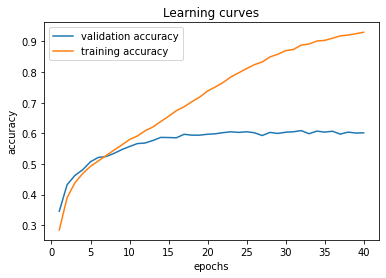

In [ ]:
plt.plot(range(1,41), model5.info.history['val_accuracy'], label='validation accuracy')
plt.plot(range(1,41), model5.info.history['accuracy'], label='training accuracy')
plt.legend()
plt.title('Learning curves')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=128)

NameError: ignored

In [ ]:
model.save('model.h5')

In [ ]:
def emotion_predict(emotions):
  objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  y_pos = np.arrange(len(objects))

  plt.bar(y_pos, emotions, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('percentage')
  plt.title('emotion')

  plt.show()

In [ ]:
import cv2

def facecrop(image):
  

In [ ]:
train_img_datagen = ImageDataGenerator(rescale=1./255)
val_img_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_img_datagen.flow_from_directory(
    'archive/train', 
    target_size = (128,128),
    batch_size = 64,
    color_mode = 'rgb',
    class_mode = 'categorical'
)
print(train_set)

val_set = val_img_datagen.flow_from_directory(
    'archive/test', 
    target_size = (128,128),
    batch_size = 64,
    color_mode = 'rgb',
    class_mode = 'categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
def create_model_5():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))
 
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))


  model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))

  model.add(tf.keras.layers.Conv2D(1024, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same', kernel_regularizer=regularizers.l2(0.08)))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))


  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(300, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(7, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), metrics=['accuracy'])

  return model  

In [ ]:
def main(model_to_create):
  model = model_to_create
  callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
  history = model.fit(train_set, steps_per_epoch=449, epochs=40, validation_data=val_set, shuffle=True, callbacks=[callback])
  return history

In [ ]:
def learning_curves(history, epochs):
  plt.plot(range(1,epochs+1), history['val_accuracy'], label='validation accuracy')
  plt.plot(range(1,epochs+1), history['accuracy'], label='training accuracy')
  plt.legend()
  plt.title('Learning curves')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')

In [ ]:
from keras import regularizers
history = main(create_model_5())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/40
449/449 [==============================] - 35s 74ms/step - loss: 1.8185 - accuracy: 0.2471 - val_loss: 1.8559 - val_accuracy: 0.1782
Epoch 2/40
449/449 [==============================] - 32s 71ms/step - loss: 1.7270 - accuracy: 0.2927 - val_loss: 1.6139 - val_accuracy: 0.3554
Epoch 3/40
449/449 [==============================] - 32s 72ms/step - loss: 1.4922 - accuracy: 0.4245 - val_loss: 1.3377 - val_accuracy: 0.4886
Epoch 4/40
449/449 [==============================] - 32s 71ms/step - loss: 1.3139 - accuracy: 0.4989 - val_loss: 1.2252 - val_accuracy: 0.5323
Epoch 5/40
449/449 [==============================] - 32s 71ms/step - loss: 1.2027 - accuracy: 0.5444 - val_loss: 1.1610 - val_accuracy: 0.5619
Epoch 6/40
449/449 [==============================] - 32s 71ms/step - loss: 1.1217 - accuracy: 0.5751 - val_loss: 1.1389 - val_accuracy: 0.5681
Epoch 7/40
449/449 [==============================] - 32s 72ms/step - loss: 1.0524 - accuracy: 0.6018 - val_loss: 1.1022 - val_accuracy:

KeyboardInterrupt: ignored